LOADING THE DATASET

In [ ]:
import pandas as pd

# Load the dataset, skipping any bad lines or errors
df = pd.read_csv('creditcard.csv', on_bad_lines='skip')  # Skips problematic lines

# Check the first few rows of the data
print(df.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

INVESTIGATING THE DATASET FOR ANY ISSUES

In [ ]:
# Check for missing values in the dataset
print(df.isnull().sum())

# Check the data types of each column
print(df.dtypes)


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64
Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object


EXPLORING THE DATASET

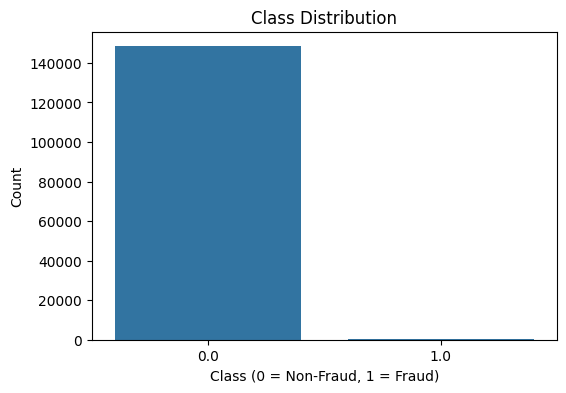

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each class (fraudulent vs. non-fraudulent)
class_counts = df['Class'].value_counts()

# Plot the class distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.show()


EXPLORING DATASET FROM KEY FEAUTURES LIKE -AMOUNT , TIME et

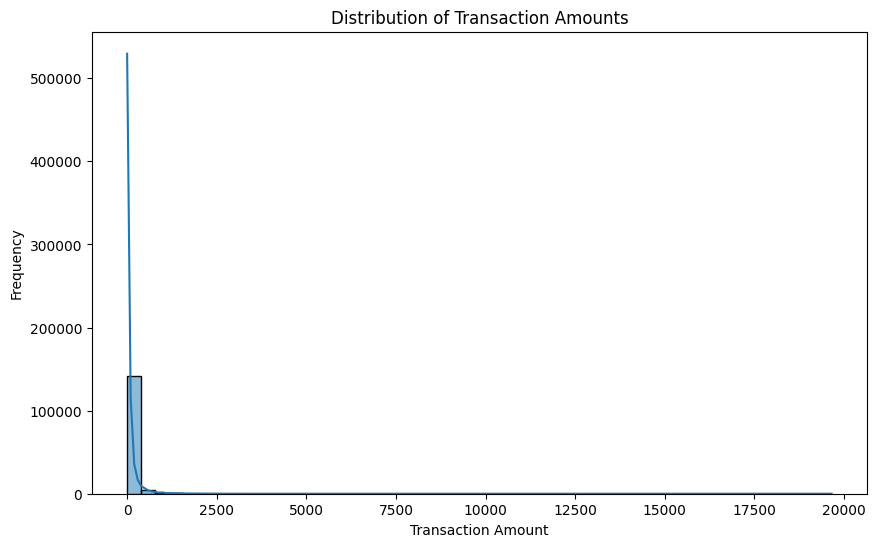

In [ ]:
# Plot the distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Define the features (X) and the target (y)
X = df.drop(columns=['Class'])  # Features (all columns except 'Class')
y = df['Class']  # Target variable (fraud or non-fraud)


In [ ]:
# Check for missing values in the target variable (y)
missing_y = y.isnull().sum()
print(f"Missing values in target variable 'Class': {missing_y}")


Missing values in target variable 'Class': 1


In [ ]:
# Drop rows where the target variable 'Class' is NaN
df_cleaned = df.dropna(subset=['Class'])

# Define the cleaned features (X) and target (y) again
X = df_cleaned.drop(columns=['Class'])
y = df_cleaned['Class']


In [ ]:
from sklearn.model_selection import train_test_split

# Split the cleaned data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
import numpy as np
import pandas as pd

# Check the data types of all columns in the training set
print(X_train.dtypes)

# Identify non-numeric columns
non_numeric_columns = X_train.select_dtypes(exclude=[np.number]).columns
print(f"Non-numeric columns: {non_numeric_columns}")

# Convert non-numeric columns to numeric, forcing errors to NaN
X_train[non_numeric_columns] = X_train[non_numeric_columns].apply(pd.to_numeric, errors='coerce')

# Check for NaNs after conversion
print(X_train.isnull().sum())

# Fill NaNs with the mean of the respective columns (or handle as appropriate)
X_train = X_train.fillna(X_train.mean())


Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
dtype: object
Non-numeric columns: Index([], dtype='object')
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64


In [ ]:
# Step 1: Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Initialize the RandomForestClassifier with fewer trees and limited depth
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, class_weight='balanced', random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Step 5: Evaluate the model's performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")



Confusion Matrix:
[[29663     7]
 [   10    47]]

Classification Report:


In [ ]:
 from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Define a very small parameter grid (updated max_features)
param_grid = {
    'n_estimators': [100],  # Only one option for n_estimators
    'max_depth': [10, 20],  # Reduced to two options
    'min_samples_split': [2],  # Only one option for min_samples_split
    'min_samples_leaf': [1],  # Only one option for min_samples_leaf
    'bootstrap': [True],  # Fixed value
    'max_features': ['sqrt', 'log2']  # Fixed to valid options
}

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV with minimal parameters for faster tuning
rf_random = RandomizedSearchCV(estimator=rf_model,
                               param_distributions=param_grid,
                               n_iter=2,  # Drastically reduced iterations for testing
                               cv=2,  # Reduced folds for speed
                               verbose=2,
                               random_state=42,
                               n_jobs=-1)

# Use a small subset of data for faster tuning
X_train_small = X_train[:5000]  # Use only 5000 samples for now
y_train_small = y_train[:5000]

# Fit RandomizedSearchCV on the smaller dataset
rf_random.fit(X_train_small, y_train_small)

# Evaluate the tuned model
best_rf_model = rf_random.best_estimator_
y_pred_tuned = best_rf_model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tuned))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tuned))



Fitting 2 folds for each of 2 candidates, totalling 4 fits
Confusion Matrix:
[[29667     3]
 [   23    34]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     29670
         1.0       0.92      0.60      0.72        57

    accuracy                           1.00     29727
   macro avg       0.96      0.80      0.86     29727
weighted avg       1.00      1.00      1.00     29727



In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Get probabilities for the positive class (fraud)
y_prob = best_rf_model.predict_proba(X_test)[:, 1]

# Set a new decision threshold (e.g., 0.4)
threshold = 0.4
y_pred_threshold = np.where(y_prob > threshold, 1, 0)

# Evaluate the model with the new threshold
print("Confusion Matrix (Threshold 0.4):")
print(confusion_matrix(y_test, y_pred_threshold))

print("\nClassification Report (Threshold 0.4):")
print(classification_report(y_test, y_pred_threshold))


Confusion Matrix (Threshold 0.4):
[[29663     7]
 [   15    42]]

Classification Report (Threshold 0.4):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     29670
         1.0       0.86      0.74      0.79        57

    accuracy                           1.00     29727
   macro avg       0.93      0.87      0.90     29727
weighted avg       1.00      1.00      1.00     29727



In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Initialize SMOTE with a limit on the sampling strategy
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # Limiting the sampling to 50% of the majority class

# Step 2: Apply SMOTE to a smaller subset of the training data for quicker testing
X_train_small = X_train[:10000]
y_train_small = y_train[:10000]
X_train_smote, y_train_smote = smote.fit_resample(X_train_small, y_train_small)

# Step 3: Train the RandomForest model with fewer trees and parallel processing
rf_model_smote = RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)  # Fewer trees and parallel processing
rf_model_smote.fit(X_train_smote, y_train_smote)

# Step 4: Make predictions on the original test set
y_pred_smote = rf_model_smote.predict(X_test)

# Step 5: Evaluate the model
print("Confusion Matrix (SMOTE):")
print(confusion_matrix(y_test, y_pred_smote))

print("\nClassification Report (SMOTE):")
print(classification_report(y_test, y_pred_smote))


Confusion Matrix (SMOTE):
[[29659    11]
 [    9    48]]

Classification Report (SMOTE):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     29670
         1.0       0.81      0.84      0.83        57

    accuracy                           1.00     29727
   macro avg       0.91      0.92      0.91     29727
weighted avg       1.00      1.00      1.00     29727



In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Make probability predictions for the test set
y_prob = rf_model_smote.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (fraud)

# Step 2: Set a custom threshold
threshold = 0.4  # You can adjust this value to experiment
y_pred_threshold = np.where(y_prob > threshold, 1, 0)  # Classify based on the new threshold

# Step 3: Evaluate the model with the new threshold
print("Confusion Matrix (Custom Threshold):")
print(confusion_matrix(y_test, y_pred_threshold))

print("\nClassification Report (Custom Threshold):")
print(classification_report(y_test, y_pred_threshold))


Confusion Matrix (Custom Threshold):
[[29657    13]
 [    9    48]]

Classification Report (Custom Threshold):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     29670
         1.0       0.79      0.84      0.81        57

    accuracy                           1.00     29727
   macro avg       0.89      0.92      0.91     29727
weighted avg       1.00      1.00      1.00     29727



In [ ]:
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Initialize SMOTE with limited sampling
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # Limit synthetic samples to 50% of the majority class

# Step 2: Use a smaller subset of the dataset for testing
X_train_small = X_train[:10000]
y_train_small = y_train[:10000]

# Step 3: Apply SMOTE to the smaller dataset
X_train_smote, y_train_smote = smote.fit_resample(X_train_small, y_train_small)

# Step 4: Define the hyperparameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # Reduced number of trees for quicker testing
    'max_depth': [10, 20, 30, None],  # Maximum depth of trees
    'min_samples_split': [2, 5],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2],  # Minimum samples required to be at a leaf node
    'bootstrap': [True, False]  # Bootstrap sampling
}

# Step 5: Initialize the RandomForestClassifier with parallel processing
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)  # Use all available cores

# Step 6: Set up RandomizedSearchCV with fewer iterations for quicker testing
rf_random_search = RandomizedSearchCV(estimator=rf_model,
                                      param_distributions=param_grid,
                                      n_iter=20,  # Reduced number of parameter combinations
                                      cv=3,  # 3-fold cross-validation
                                      verbose=2,
                                      random_state=42,
                                      n_jobs=-1)  # Parallel processing

# Step 7: Fit RandomizedSearchCV on the SMOTE-balanced training data
rf_random_search.fit(X_train_smote, y_train_smote)

# Step 8: Print the best hyperparameters found
print("Best Hyperparameters:", rf_random_search.best_params_)

# Step 9: Get the best model and make predictions on the test set
best_rf_model = rf_random_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

# Step 10: Evaluate the tuned model
print("Confusion Matrix (Tuned Model):")
print(confusion_matrix(y_test, y_pred_best_rf))

print("\nClassification Report (Tuned Model):")
print(classification_report(y_test, y_pred_best_rf))


Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': False}
Confusion Matrix (Tuned Model):
[[29659    11]
 [   11    46]]

Classification Report (Tuned Model):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     29670
         1.0       0.81      0.81      0.81        57

    accuracy                           1.00     29727
   macro avg       0.90      0.90      0.90     29727
weighted avg       1.00      1.00      1.00     29727

